In [12]:

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
#from hetroneModel.utils import *
import pandas as pd
import numpy as np
# base
import math

import pandas as pd
import numpy as np
import sys
import datetime
import re
# data process
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures, LabelBinarizer
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_string_dtype
from sklearn.feature_extraction import DictVectorizer
import seaborn as sns
# model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegressionCV, LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score,f1_score
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
import lightgbm as lgb
# model test
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [13]:
import pandas as pd
df_transform = pd.read_csv('data/train_transform.csv', index_col= 'PERSONID')

In [14]:
df_transform.shape

(17500, 945)

In [15]:
df_train = df_transform.loc[df_transform.LABEL_unique != 2,:]
df_test = df_transform.loc[df_transform.LABEL_unique ==2, :]
df_test.drop(['LABEL_unique'], axis = 1, inplace= True)

Y = df_train.LABEL_unique
X = df_train.drop(['LABEL_unique'], axis = 1)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=0)



/Users/lihongwang/miniconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
print(X.shape)
X_train.head()

(15000, 944)


,Unnamed: 0,FTR51_max_group=A0B0C0E0D0,"FTR51_max_group=A0B0C0E0D0,A0B0C10E23D12","FTR51_max_group=A0B0C0E0D0,A0B0C10E5D3","FTR51_max_group=A0B0C0E0D0,A0B0C2759E5D3","FTR51_max_group=A0B0C0E0D0,A0B0C2E0D1","FTR51_max_group=A0B0C0E0D0,A0B0C2E129D1","FTR51_max_group=A0B0C0E0D0,A0B0C2E16D1","FTR51_max_group=A0B0C0E0D0,A0B0C2E1D1","FTR51_max_group=A0B0C0E0D0,A0B0C2E2D1",...,FTR49_sum,FTR49_std,FTR50_mean,FTR50_sum,FTR50_std,APPLYNO_count,FTR51_nunique,FTR51_max_med,FTR51_total_med,FTR51_type_med
PERSONID,,,,,,,,,,,,,,,,,,,,,
b2f0c5b71845b1bb6865dacd3eac454a,12200,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000109,0.031284,0.000291,288,66,0,5523,16
9e1b67207bf6b4a2a458700a8c519734,10794,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000106,0.006767,0.000263,64,34,0,2137,16
0e4dfe053cbd52c3ae3a0ef094fe1390,953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000075,0.008775,0.000223,117,56,0,5587,16
c4da5b6c0d49e72ff9e36d6cd9502a22,13426,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000969,0.024231,0.001116,25,15,0,826,16
c8b6b95bfa90cbb6572a6c4cb16c08b4,13679,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,139,57,0,4068,16


In [16]:
# lgb model
def lgb_sklearn(train_x, test_x, train_y, test_y):
    gbm = lgb.LGBMClassifier(objective='binary',
                             # n_jobs=-1,
                             is_unbalance=True,
                             # num_threads=8,
                             two_round=True,
                             bagging_fraction=1,
                             bagging_freq=1,
                             boosting_type='gbdt',    # gbdt
                             feature_fraction=0.8,
                             learning_rate=0.01,
                             # min_child_samples=10,
                             # min_child_weight=5,
                             # min_data_in_leaf=20,
                             # min_split_gain=0.0,
                             n_estimators=800,
                             num_leaves=32,
                             reg_alpha=0.001,      # 减少过拟合，概率分布更两极化
                             # reg_lambda=0.00001,
                             # subsample=0.5,     # 没有影响
                             silent=False,
                             verbose=2
                             )
    estimators = gbm.fit(train_x,train_y)

    y_pred = estimators.predict_proba(test_x)[:,1]
    y_predict = [1 if i > 0.5 else 0 for i in y_pred]
    print("lgb model auc: ", roc_auc_score(test_y, y_pred))
    print("lgb f1score: ",f1_score(test_y, y_predict, average='binary'))
    PlotKS(y_pred,test_y,445,0) 
    plt.hist(y_pred)
    plt.show()
    return estimators

In [18]:
# KS 曲线
def PlotKS(preds, labels, n, asc):
    # preds is score: asc=1
    # preds is prob: asc=0

    pred = preds  # 预测值
    bad = labels  # 取1为bad, 0为good
    ksds = pd.DataFrame({'bad': bad, 'pred': pred})
    ksds['good'] = 1 - ksds.bad

    if asc == 1:
        ksds1 = ksds.sort_values(by=['pred', 'bad'], ascending=[True, True])
    elif asc == 0:
        ksds1 = ksds.sort_values(by=['pred', 'bad'], ascending=[False, True])
    ksds1.index = range(len(ksds1.pred))
    ksds1['cumsum_good1'] = 1.0 * ksds1.good.cumsum() / sum(ksds1.good)
    ksds1['cumsum_bad1'] = 1.0 * ksds1.bad.cumsum() / sum(ksds1.bad)

    if asc == 1:
        ksds2 = ksds.sort_values(by=['pred', 'bad'], ascending=[True, False])
    elif asc == 0:
        ksds2 = ksds.sort_values(by=['pred', 'bad'], ascending=[False, False])
    ksds2.index = range(len(ksds2.pred))
    ksds2['cumsum_good2'] = 1.0 * ksds2.good.cumsum() / sum(ksds2.good)
    ksds2['cumsum_bad2'] = 1.0 * ksds2.bad.cumsum() / sum(ksds2.bad)

    # ksds1 ksds2 -> average
    ksds = ksds1[['cumsum_good1', 'cumsum_bad1']]
    ksds['cumsum_good2'] = ksds2['cumsum_good2']
    ksds['cumsum_bad2'] = ksds2['cumsum_bad2']
    ksds['cumsum_good'] = (ksds['cumsum_good1'] + ksds['cumsum_good2']) / 2
    ksds['cumsum_bad'] = (ksds['cumsum_bad1'] + ksds['cumsum_bad2']) / 2

    # ks
    ksds['ks'] = ksds['cumsum_bad'] - ksds['cumsum_good']
    ksds['tile0'] = range(1, len(ksds.ks) + 1)
    ksds['tile'] = 1.0 * ksds['tile0'] / len(ksds['tile0'])

    qe = list(np.arange(0, 1, 1.0 / n))
    qe.append(1)
    qe = qe[1:]

    ks_index = pd.Series(ksds.index)
    ks_index = ks_index.quantile(q=qe)
    ks_index = np.ceil(ks_index).astype(int)
    ks_index = list(ks_index)

    ksds = ksds.loc[ks_index]
    ksds = ksds[['tile', 'cumsum_good', 'cumsum_bad', 'ks']]
    ksds0 = np.array([[0, 0, 0, 0]])
    ksds = np.concatenate([ksds0, ksds], axis=0)
    ksds = pd.DataFrame(ksds, columns=['tile', 'cumsum_good', 'cumsum_bad', 'ks'])

    ks_value = ksds.ks.max()
    ks_pop = ksds.tile[ksds.ks.idxmax()]
    print ('ks_value is ' + str(np.round(ks_value, 4)) + ' at pop = ' + str(np.round(ks_pop, 4)))

    # chart
    plt.plot(ksds.tile, ksds.cumsum_good, label='cum_good',
             color='blue', linestyle='-', linewidth=2)

    plt.plot(ksds.tile, ksds.cumsum_bad, label='cum_bad',
             color='red', linestyle='-', linewidth=2)

    plt.plot(ksds.tile, ksds.ks, label='ks',
             color='green', linestyle='-', linewidth=2)

    plt.axvline(ks_pop, color='gray', linestyle='--')
    plt.axhline(ks_value, color='green', linestyle='--')
    plt.axhline(ksds.loc[ksds.ks.idxmax(), 'cumsum_good'], color='blue', linestyle='--')
    plt.axhline(ksds.loc[ksds.ks.idxmax(), 'cumsum_bad'], color='red', linestyle='--')
    plt.title('KS=%s ' % np.round(ks_value, 4) +
              'at Pop=%s' % np.round(ks_pop, 4), fontsize=15)

    plt.show()
    return ksds

lgb model auc:  0.9072605556061941
lgb f1score:  0.4478935698447894
ks_value is 0.6442 at pop = 0.2116


/Users/lihongwang/miniconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/lihongwang/miniconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


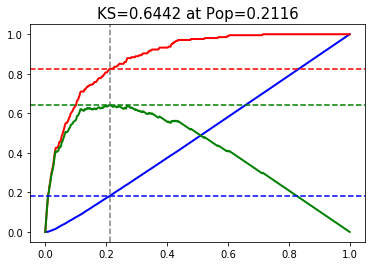

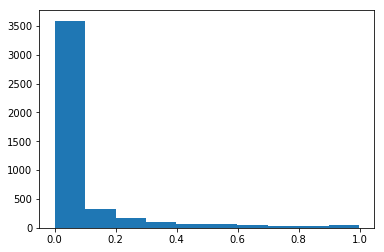

In [19]:
model = lgb_sklearn(X_train,  X_test, y_train, y_test)

In [26]:

# # 逻辑回归模型
# log_model = LogisticRegression()
# # 训练逻辑回归模型
# log_model.fit(X_train, y_train)
 
# # 预测y的值
# y_pred = log_model.predict_proba(X_test)[:,1]
 
# # 查看测试结果
# roc_auc_score(y_test, y_pred)


In [21]:
import xgboost as xgb
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)
params={'booster':'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth':4,
    'lambda':10,
    'subsample':0.75,
    'colsample_bytree':0.75,
    'min_child_weight':2,
    'eta': 0.025,
    'seed':0,
    'nthread':8,
     'silent':1}
watchlist = [(dtrain,'train')]
bst=xgb.train(params,dtrain,num_boost_round=100,evals=watchlist)
y_pred=bst.predict(dtest)
roc_auc_score(y_test, y_pred)

[0]	train-auc:0.722927
[1]	train-auc:0.729638
[2]	train-auc:0.733966
[3]	train-auc:0.734566
[4]	train-auc:0.734616
[5]	train-auc:0.734564
[6]	train-auc:0.736051
[7]	train-auc:0.737984
[8]	train-auc:0.739798
[9]	train-auc:0.739736
[10]	train-auc:0.740382
[11]	train-auc:0.740314
[12]	train-auc:0.806605
[13]	train-auc:0.842684
[14]	train-auc:0.843245
[15]	train-auc:0.84461
[16]	train-auc:0.845803
[17]	train-auc:0.849204
[18]	train-auc:0.849154
[19]	train-auc:0.848337
[20]	train-auc:0.860146
[21]	train-auc:0.860158
[22]	train-auc:0.860193
[23]	train-auc:0.860165
[24]	train-auc:0.861521
[25]	train-auc:0.861293
[26]	train-auc:0.862278
[27]	train-auc:0.861753
[28]	train-auc:0.861321
[29]	train-auc:0.86224
[30]	train-auc:0.862052
[31]	train-auc:0.862241
[32]	train-auc:0.86241
[33]	train-auc:0.863167
[34]	train-auc:0.864217
[35]	train-auc:0.865953
[36]	train-auc:0.865747
[37]	train-auc:0.866133
[38]	train-auc:0.86686
[39]	train-auc:0.867454
[40]	train-auc:0.867893
[41]	train-auc:0.868538
[42]	t

0.8787898736399329

In [22]:
y_pred

array([0.05451208, 0.21554612, 0.05630496, ..., 0.07816216, 0.07818032,
       0.05632721], dtype=float32)

In [25]:
# log_model_submit = LogisticRegression()
# # 训练逻辑回归模型
# log_model_submit.fit(X, Y)
 
# # 预测y的值
# y_pred = log_model_submit.predict_proba(df_test)

# df_result = pd.DataFrame()
# df_result['PERSONID'] = df_test.index
# df_result['PREDICT'] = y_pred[:,1]
# df_result.to_csv('data/predict_A.csv', sep = '\t', header= False, index= False)

In [24]:
dtrain=xgb.DMatrix(X,label= Y)
dtest=xgb.DMatrix(df_test)
params={'booster':'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth':4,
    'lambda':10,
    'subsample':0.75,
    'colsample_bytree':0.75,
    'min_child_weight':2,
    'eta': 0.025,
    'seed':0,
    'nthread':8,
     'silent':1}
watchlist = [(dtrain,'train')]
bst=xgb.train(params,dtrain,num_boost_round=100,evals=watchlist)
y_pred=bst.predict(dtest)


[0]	train-auc:0.688621
[1]	train-auc:0.697687
[2]	train-auc:0.71306
[3]	train-auc:0.714667
[4]	train-auc:0.715576
[5]	train-auc:0.784937
[6]	train-auc:0.787182
[7]	train-auc:0.78733
[8]	train-auc:0.788372
[9]	train-auc:0.797087
[10]	train-auc:0.831819
[11]	train-auc:0.832038
[12]	train-auc:0.832701
[13]	train-auc:0.833207
[14]	train-auc:0.834146
[15]	train-auc:0.835334
[16]	train-auc:0.835151
[17]	train-auc:0.837258
[18]	train-auc:0.837626
[19]	train-auc:0.838438
[20]	train-auc:0.838999
[21]	train-auc:0.838945
[22]	train-auc:0.840666
[23]	train-auc:0.840721
[24]	train-auc:0.844059
[25]	train-auc:0.846798
[26]	train-auc:0.847523
[27]	train-auc:0.848776
[28]	train-auc:0.849379
[29]	train-auc:0.851669
[30]	train-auc:0.852273
[31]	train-auc:0.854001
[32]	train-auc:0.854318
[33]	train-auc:0.854864
[34]	train-auc:0.855532
[35]	train-auc:0.856266
[36]	train-auc:0.864182
[37]	train-auc:0.864399
[38]	train-auc:0.864311
[39]	train-auc:0.864876
[40]	train-auc:0.865702
[41]	train-auc:0.867476
[42]

In [29]:
df_result = pd.DataFrame()
df_result['PERSONID'] = df_test.index
df_result['PREDICT'] = y_pred
df_result.to_csv('data/predict_A.csv', sep = '\t', header= False, index= False)